In [1]:
# ----------------------------------------
# Ex3.ipynb : Descriptive Statistics Project
# ----------------------------------------

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Make plots look nicer
plt.style.use("seaborn-v0_8")


In [2]:
# Load datasets
f500 = pd.read_csv("F500.csv")  # Fortune 500 dataset
inc_exp = pd.read_csv("Inc_Exp_Data.csv")  # Household Income-Expenditure dataset

# Display first rows
print("Fortune 500 dataset preview:")
display(f500.head())

print("Income-Expenditure dataset preview:")
display(inc_exp.head())


Fortune 500 dataset preview:


,Company,Rank,Year,Revenue (in millions),Profit (in millions)
0,General Motors Corporation,1,1996,168828.6,NaN
1,Ford Motor Company,2,1996,137137.0,NaN
2,Exxon Corporation,3,1996,110009.0,NaN
3,"Wal-Mart Stores, Inc.",4,1996,93627.0,NaN
4,AT&T Corp.,5,1996,79609.0,NaN


Income-Expenditure dataset preview:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [3]:
# General info
print("\nF500 Info:")
print(f500.info())

print("\nIncome-Expenditure Info:")
print(inc_exp.info())

# Summary statistics
print("\nF500 Summary:")
display(f500.describe(include="all"))

print("\nIncome-Expenditure Summary:")
display(inc_exp.describe(include="all"))



F500 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13940 entries, 0 to 13939
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company                13940 non-null  object 
 1   Rank                   13940 non-null  int64  
 2   Year                   13940 non-null  int64  
 3   Revenue (in millions)  13940 non-null  float64
 4   Profit (in millions)   5497 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 544.7+ KB
None

Income-Expenditure Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     in

,Company,Rank,Year,Revenue (in millions),Profit (in millions)
count,13940,13940.000000,13940.000000,13940.000000,5497.000000
unique,2255,NaN,NaN,NaN,NaN
top,U.S. Bancorp,NaN,NaN,NaN,NaN
freq,28,NaN,NaN,NaN,NaN
mean,NaN,250.511765,2009.537231,20225.158016,2501.271621
std,NaN,144.368022,8.071421,35994.023496,5626.509092
min,NaN,1.000000,1996.000000,48.290000,-12650.000000
25%,NaN,125.000000,2003.000000,5806.225000,390.000000
50%,NaN,250.500000,2010.000000,9587.500000,948.000000
75%,NaN,375.250000,2017.000000,19109.000000,2319.000000



Income-Expenditure Summary:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50,50.000000
unique,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,Graduate,NaN
freq,NaN,NaN,NaN,NaN,NaN,19,NaN
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,NaN,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,NaN,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,NaN,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,NaN,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,NaN,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,NaN,2.000000


In [4]:
# Revenue column
rev = f500["Revenues"]

# Measures of central tendency
mean_val = rev.mean()
median_val = rev.median()
mode_val = rev.mode()[0]

# Measures of dispersion
variance_val = rev.var()
std_val = rev.std()
cv_val = std_val / mean_val
iqr_val = rev.quantile(0.75) - rev.quantile(0.25)
min_val, max_val = rev.min(), rev.max()
range_val = max_val - min_val

# Shape
skew_val = rev.skew()
kurt_val = rev.kurt()

# Collect results
f500_stats = pd.DataFrame({
    "Mean": [mean_val],
    "Median": [median_val],
    "Mode": [mode_val],
    "Variance": [variance_val],
    "Std Dev": [std_val],
    "Coeff Variation": [cv_val],
    "Min": [min_val],
    "Max": [max_val],
    "Range": [range_val],
    "IQR": [iqr_val],
    "Skewness": [skew_val],
    "Kurtosis": [kurt_val]
})
f500_stats


KeyError: 'Revenues'

In [5]:
print(f500.columns)


Index(['Company', 'Rank', 'Year', 'Revenue (in millions)',
       'Profit (in millions)'],
      dtype='object')


In [6]:
# Select the correct column
rev = f500["Revenue (in millions)"]

# Descriptive statistics
desc_stats = {
    "Mean": rev.mean(),
    "Median": rev.median(),
    "Mode": rev.mode()[0],
    "Variance": rev.var(),
    "Std Dev": rev.std(),
    "Min": rev.min(),
    "Max": rev.max(),
    "IQR": rev.quantile(0.75) - rev.quantile(0.25),
    "Skewness": rev.skew(),
    "Kurtosis": rev.kurt()
}

pd.DataFrame(desc_stats, index=["Revenue Stats"])


,Mean,Median,Mode,Variance,Std Dev,Min,Max,IQR,Skewness,Kurtosis
Revenue Stats,20225.158016,9587.5,5810.0,1.295570e+09,35994.023496,48.29,611289.0,13302.775,6.355595,60.288318


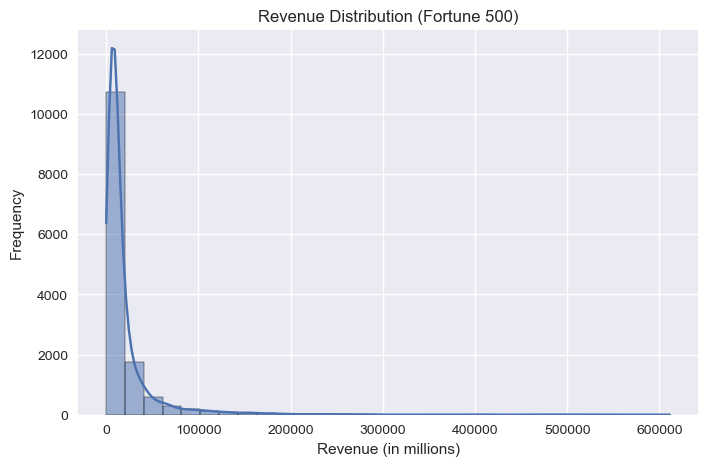

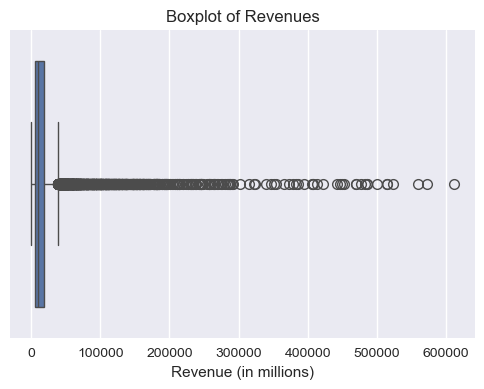

In [7]:
# Histogram with KDE
plt.figure(figsize=(8,5))
sns.histplot(rev, bins=30, kde=True)
plt.title("Revenue Distribution (Fortune 500)")
plt.xlabel("Revenue (in millions)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=rev)
plt.title("Boxplot of Revenues")
plt.xlabel("Revenue (in millions)")
plt.show()


In [8]:
# 1. Central tendency of income/expense
income_mean = inc_exp["Mthly_HH_Income"].mean()
income_median = inc_exp["Mthly_HH_Income"].median()
income_mode = inc_exp["Mthly_HH_Income"].mode()[0]

expense_mean = inc_exp["Mthly_HH_Expense"].mean()
expense_median = inc_exp["Mthly_HH_Expense"].median()

# Range
income_range = inc_exp["Mthly_HH_Income"].max() - inc_exp["Mthly_HH_Income"].min()

# Highest income-to-expense ratio
inc_exp["Inc_Exp_Ratio"] = inc_exp["Mthly_HH_Income"] / inc_exp["Mthly_HH_Expense"]
highest_ratio_row = inc_exp.loc[inc_exp["Inc_Exp_Ratio"].idxmax()]

print("Mean Income:", income_mean)
print("Median Income:", income_median)
print("Mode Income:", income_mode)
print("Expense Mean vs Median:", expense_mean, expense_median)
print("Income Range:", income_range)
print("Highest income-expense ratio household:\n", highest_ratio_row)


Mean Income: 41558.0
Median Income: 35000.0
Mode Income: 45000
Expense Mean vs Median: 18818.0 15500.0
Income Range: 95000
Highest income-expense ratio household:
 Mthly_HH_Income                70000
Mthly_HH_Expense                9000
No_of_Fly_Members                  2
Emi_or_Rent_Amt                    0
Annual_HH_Income              756000
Highest_Qualified_Member    Graduate
No_of_Earning_Members              1
Inc_Exp_Ratio               7.777778
Name: 42, dtype: object


In [9]:
avg_family_members = inc_exp["No_of_Fly_Members"].mean()
std_family_members = inc_exp["No_of_Fly_Members"].std()

# Dependency ratio = (non-earning / total members)
inc_exp["Dependency_Ratio"] = (inc_exp["No_of_Fly_Members"] - inc_exp["No_of_Earning_Members"]) / inc_exp["No_of_Fly_Members"]
highest_dep_row = inc_exp.loc[inc_exp["Dependency_Ratio"].idxmax()]

print("Average family size:", avg_family_members)
print("Std dev of family size:", std_family_members)
print("Highest dependency ratio household:\n", highest_dep_row)


Average family size: 4.06
Std dev of family size: 1.5173822786601394
Highest dependency ratio household:
 Mthly_HH_Income                  22000
Mthly_HH_Expense                 25000
No_of_Fly_Members                    6
Emi_or_Rent_Amt                  12000
Annual_HH_Income                279840
Highest_Qualified_Member    Illiterate
No_of_Earning_Members                1
Inc_Exp_Ratio                     0.88
Dependency_Ratio              0.833333
Name: 11, dtype: object


In [10]:
# EMI percentage of income
inc_exp["EMI_pct_income"] = inc_exp["Emi_or_Rent_Amt"] / inc_exp["Mthly_HH_Income"] * 100

avg_emi_pct = inc_exp["EMI_pct_income"].mean()
emi_above_40 = inc_exp[inc_exp["EMI_pct_income"] > 40]

# Lowest disposable income
inc_exp["Disposable_Income"] = inc_exp["Mthly_HH_Income"] - inc_exp["Mthly_HH_Expense"] - inc_exp["Emi_or_Rent_Amt"]
lowest_disposable_row = inc_exp.loc[inc_exp["Disposable_Income"].idxmin()]

print("Avg EMI % of income:", avg_emi_pct)
print("Households with EMI > 40%:\n", emi_above_40)
print("Lowest disposable income household:\n", lowest_disposable_row)


Avg EMI % of income: 12.694386798751193
Households with EMI > 40%:
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
1              6000              7000                  2             3000   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
11            22000             25000                  6            12000   

    Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  \
1              79920               Illiterate                      1   
6             167400            Post-Graduate                      1   
7             216000                 Graduate                      1   
11            279840               Illiterate                      1   

    Inc_Exp_Ratio  Dependency_Ratio  EMI_pct_income  
1        0.857143          0.500000       50.000000  
6        0.937500          0.666667      233.333333  
7        0.900000      

In [11]:
# Consistency check
inc_exp["Calc_Annual"] = inc_exp["Mthly_HH_Income"] * 12
discrepancies = inc_exp[inc_exp["Annual_HH_Income"] != inc_exp["Calc_Annual"]]

# Group by qualification
qual_income = inc_exp.groupby("Highest_Qualified_Member")["Mthly_HH_Income"].agg(["mean", "median"])

print("Discrepancies in Annual Income:\n", discrepancies)
print("\nIncome by Qualification:\n", qual_income)


Discrepancies in Annual Income:
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   
12            23400              5000      

In [12]:
# Outlier detection using Z-score
inc_exp["z_income"] = stats.zscore(inc_exp["Mthly_HH_Income"])
outliers = inc_exp[np.abs(inc_exp["z_income"]) > 3]

# Correlations
corr_income_exp = inc_exp["Mthly_HH_Income"].corr(inc_exp["Mthly_HH_Expense"])
corr_earn_income = inc_exp["Mthly_HH_Income"].corr(inc_exp["No_of_Earning_Members"])

print("Outliers in Monthly Income:\n", outliers)
print("Correlation Income vs Expense:", corr_income_exp)
print("Correlation Earning Members vs Income:", corr_earn_income)


Outliers in Monthly Income:
 Empty DataFrame
Columns: [Mthly_HH_Income, Mthly_HH_Expense, No_of_Fly_Members, Emi_or_Rent_Amt, Annual_HH_Income, Highest_Qualified_Member, No_of_Earning_Members, Inc_Exp_Ratio, Dependency_Ratio, EMI_pct_income, Disposable_Income, Calc_Annual, z_income]
Index: []
Correlation Income vs Expense: 0.6492152549316462
Correlation Earning Members vs Income: 0.34788345602238385


In [14]:
#INCOME EXPENDITURE # Load dataset
inc_exp = pd.read_csv("Inc_Exp_Data.csv")

# Preview
inc_exp.head()


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [15]:
# Mean, median, mode of income
income_mean = inc_exp["Mthly_HH_Income"].mean()
income_median = inc_exp["Mthly_HH_Income"].median()
income_mode = inc_exp["Mthly_HH_Income"].mode()[0]

# Compare expense mean & median
expense_mean = inc_exp["Mthly_HH_Expense"].mean()
expense_median = inc_exp["Mthly_HH_Expense"].median()

# Range of monthly income
income_range = inc_exp["Mthly_HH_Income"].max() - inc_exp["Mthly_HH_Income"].min()

# Highest income-to-expense ratio
inc_exp["Inc_Exp_Ratio"] = inc_exp["Mthly_HH_Income"] / inc_exp["Mthly_HH_Expense"]
highest_ratio_row = inc_exp.loc[inc_exp["Inc_Exp_Ratio"].idxmax()]

print("Mean Income:", income_mean)
print("Median Income:", income_median)
print("Mode Income:", income_mode)
print("Expense Mean:", expense_mean)
print("Expense Median:", expense_median)
print("Income Range:", income_range)
print("\nHousehold with Highest Income-to-Expense Ratio:\n", highest_ratio_row)


Mean Income: 41558.0
Median Income: 35000.0
Mode Income: 45000
Expense Mean: 18818.0
Expense Median: 15500.0
Income Range: 95000

Household with Highest Income-to-Expense Ratio:
 Mthly_HH_Income                70000
Mthly_HH_Expense                9000
No_of_Fly_Members                  2
Emi_or_Rent_Amt                    0
Annual_HH_Income              756000
Highest_Qualified_Member    Graduate
No_of_Earning_Members              1
Inc_Exp_Ratio               7.777778
Name: 42, dtype: object


In [16]:
# Average number of family members
avg_family_members = inc_exp["No_of_Fly_Members"].mean()

# Standard deviation of family size
std_family_members = inc_exp["No_of_Fly_Members"].std()

# Dependency ratio = (non-earning ÷ total members)
inc_exp["Dependency_Ratio"] = (inc_exp["No_of_Fly_Members"] - inc_exp["No_of_Earning_Members"]) / inc_exp["No_of_Fly_Members"]
highest_dep_row = inc_exp.loc[inc_exp["Dependency_Ratio"].idxmax()]

print("Average Family Members:", avg_family_members)
print("Std Dev Family Members:", std_family_members)
print("\nHousehold with Highest Dependency Ratio:\n", highest_dep_row)


Average Family Members: 4.06
Std Dev Family Members: 1.5173822786601394

Household with Highest Dependency Ratio:
 Mthly_HH_Income                  22000
Mthly_HH_Expense                 25000
No_of_Fly_Members                    6
Emi_or_Rent_Amt                  12000
Annual_HH_Income                279840
Highest_Qualified_Member    Illiterate
No_of_Earning_Members                1
Inc_Exp_Ratio                     0.88
Dependency_Ratio              0.833333
Name: 11, dtype: object


In [17]:
# EMI % of monthly income
inc_exp["EMI_pct_income"] = inc_exp["Emi_or_Rent_Amt"] / inc_exp["Mthly_HH_Income"] * 100
avg_emi_pct = inc_exp["EMI_pct_income"].mean()

# Households with EMI > 40% of income
emi_above_40 = inc_exp[inc_exp["EMI_pct_income"] > 40]

# Lowest disposable income
inc_exp["Disposable_Income"] = inc_exp["Mthly_HH_Income"] - inc_exp["Mthly_HH_Expense"] - inc_exp["Emi_or_Rent_Amt"]
lowest_disposable_row = inc_exp.loc[inc_exp["Disposable_Income"].idxmin()]

print("Avg EMI % of income:", avg_emi_pct)
print("\nHouseholds with EMI > 40%:\n", emi_above_40)
print("\nLowest Disposable Income Household:\n", lowest_disposable_row)


Avg EMI % of income: 12.694386798751193

Households with EMI > 40%:
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
1              6000              7000                  2             3000   
6             15000             16000                  3            35000   
7             18000             20000                  5             8000   
11            22000             25000                  6            12000   

    Annual_HH_Income Highest_Qualified_Member  No_of_Earning_Members  \
1              79920               Illiterate                      1   
6             167400            Post-Graduate                      1   
7             216000                 Graduate                      1   
11            279840               Illiterate                      1   

    Inc_Exp_Ratio  Dependency_Ratio  EMI_pct_income  
1        0.857143          0.500000       50.000000  
6        0.937500          0.666667      233.333333  
7        0.900000     

In [18]:
# Check consistency of annual income
inc_exp["Calc_Annual"] = inc_exp["Mthly_HH_Income"] * 12
discrepancies = inc_exp[inc_exp["Annual_HH_Income"] != inc_exp["Calc_Annual"]]

# Group by qualification
qual_income = inc_exp.groupby("Highest_Qualified_Member")["Mthly_HH_Income"].agg(["mean", "median"])

print("Discrepancies in Annual Income:\n", discrepancies)
print("\nIncome by Qualification:\n", qual_income)


Discrepancies in Annual Income:
     Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  Emi_or_Rent_Amt  \
0              5000              8000                  3             2000   
1              6000              7000                  2             3000   
2             10000              4500                  2                0   
3             10000              2000                  1                0   
4             12500             12000                  2             3000   
5             14000              8000                  2                0   
6             15000             16000                  3            35000   
8             19000              9000                  2                0   
9             20000              9000                  4                0   
10            20000             18000                  4             8000   
11            22000             25000                  6            12000   
12            23400              5000      

In [19]:
# Outliers using Z-score
inc_exp["z_income"] = stats.zscore(inc_exp["Mthly_HH_Income"])
outliers = inc_exp[np.abs(inc_exp["z_income"]) > 3]

# Correlations
corr_income_exp = inc_exp["Mthly_HH_Income"].corr(inc_exp["Mthly_HH_Expense"])
corr_earn_income = inc_exp["Mthly_HH_Income"].corr(inc_exp["No_of_Earning_Members"])

print("Outliers in Monthly Income:\n", outliers)
print("Correlation Income vs Expense:", corr_income_exp)
print("Correlation Earning Members vs Income:", corr_earn_income)


Outliers in Monthly Income:
 Empty DataFrame
Columns: [Mthly_HH_Income, Mthly_HH_Expense, No_of_Fly_Members, Emi_or_Rent_Amt, Annual_HH_Income, Highest_Qualified_Member, No_of_Earning_Members, Inc_Exp_Ratio, Dependency_Ratio, EMI_pct_income, Disposable_Income, Calc_Annual, z_income]
Index: []
Correlation Income vs Expense: 0.6492152549316462
Correlation Earning Members vs Income: 0.34788345602238385
